In [1]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is 6480-685C

 Directory of D:\Minor

18-03-2025  11:39 PM    <DIR>          .
18-03-2025  11:39 PM    <DIR>          ..
24-02-2025  06:36 PM    <DIR>          .ipynb_checkpoints
19-04-2024  01:02 PM        62,789,876 Fake.csv
01-04-2025  06:20 PM         2,735,208 Fake-news.ipynb
18-03-2025  11:08 PM    <DIR>          images
19-04-2024  01:02 PM        53,582,940 True.csv
               3 File(s)    119,108,024 bytes
               4 Dir(s)   1,513,963,520 bytes free


Imports

In [2]:
#imports
import numpy as np
import pandas as pd

In [3]:
#Loading Data 
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Subject Count

In [6]:
#subject count
fake['subject']

0               News
1               News
2               News
3               News
4               News
            ...     
23476    Middle-east
23477    Middle-east
23478    Middle-east
23479    Middle-east
23480    Middle-east
Name: subject, Length: 23481, dtype: object

In [7]:
fake['subject'].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [8]:
true.subject.value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

Category for fake and true

In [9]:
fake['category']=1
true['category']=0

Joining 2 DataFrams and reset index

In [10]:
df = pd.concat([fake,true]).reset_index(drop=True)

In [11]:
df.tail()

,title,text,subject,date,category
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


Visualize

In [12]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Vansh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


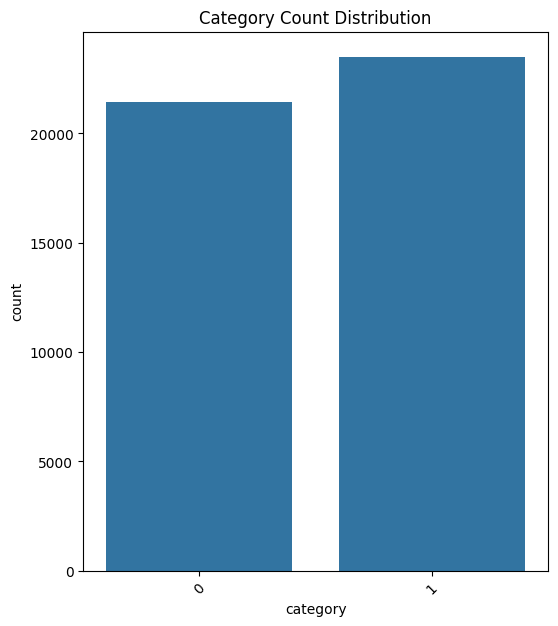

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,7))
sns.countplot(x=df['category'])  # or use y=df['category'] for a horizontal plot
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed
plt.title("Category Count Distribution")
plt.show()

<Axes: xlabel='count', ylabel='subject'>

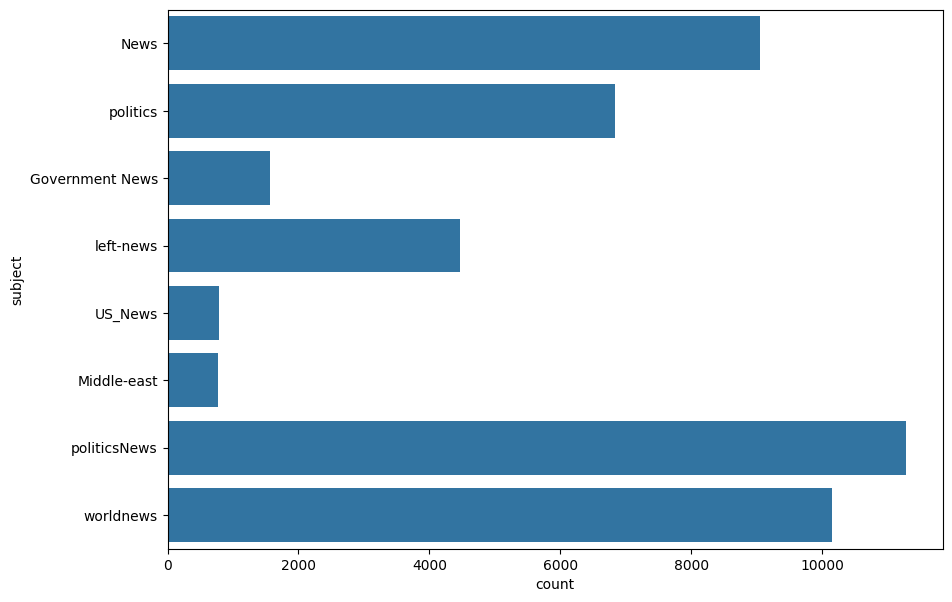

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.countplot(df['subject'])

In [15]:
df = df[['text','category']]

In [16]:
df.head()

,text,category
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


Data Cleaning

In [17]:
df.isna().sum()*100/len(df)

text        0.0
category    0.0
dtype: float64

In [18]:
blanks = []

for index, text in df['text'].items():
    if isinstance(text, str) and text.strip() == "":  
        blanks.append(index)

len(blanks)


631

In [19]:
blanks

[10923,
 11041,
 11190,
 11225,
 11236,
 11241,
 11247,
 11249,
 11267,
 11268,
 11283,
 11284,
 11285,
 11289,
 11290,
 11292,
 11295,
 11296,
 11301,
 11303,
 11304,
 11305,
 11309,
 11314,
 11317,
 11319,
 11322,
 11330,
 11334,
 11335,
 11340,
 11343,
 11348,
 11351,
 11352,
 11357,
 11371,
 11373,
 11374,
 11382,
 11397,
 11402,
 11403,
 11409,
 11410,
 11412,
 11415,
 11419,
 11421,
 11427,
 11431,
 11432,
 11440,
 11448,
 11450,
 11453,
 11462,
 11464,
 11465,
 11472,
 11473,
 11475,
 11478,
 11489,
 11491,
 11493,
 11494,
 11501,
 11505,
 11507,
 11520,
 11531,
 11532,
 11533,
 11538,
 11542,
 11547,
 11549,
 11551,
 11559,
 11563,
 11581,
 11585,
 11589,
 11590,
 11614,
 11624,
 11625,
 11627,
 11631,
 11636,
 11637,
 11643,
 11650,
 11658,
 11661,
 11672,
 11679,
 11681,
 11684,
 11686,
 11688,
 11692,
 11708,
 11718,
 11729,
 11739,
 11753,
 11765,
 11768,
 11777,
 11782,
 11786,
 11788,
 11792,
 11793,
 11803,
 11806,
 11813,
 11821,
 11831,
 11832,
 11841,
 11844,
 11848,


In [20]:
df['text'][10923]

' '

In [21]:
df.shape

(44898, 2)

In [22]:
df.drop(blanks, inplace=True)

In [23]:
df.shape

(44267, 2)

In [24]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Vansh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [25]:
pip install spacy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Vansh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [26]:
!python -m pip install --upgrade pip setuptools wheel

Defaulting to user installation because normal site-packages is not writeable
  Using cached setuptools-78.1.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools-78.1.0-py3-none-any.whl (1.3 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 76.1.0
    Uninstalling setuptools-76.1.0:
      Successfully uninstalled setuptools-76.1.0


In [27]:
!pip uninstall numpy -y
!pip install numpy --upgrade

Found existing installation: numpy 2.2.4
Uninstalling numpy-2.2.4:
  Successfully uninstalled numpy-2.2.4
Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.2.4-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.4-cp313-cp313-win_amd64.whl (12.6 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [28]:
!python --version

Python 3.13.1


In [29]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vansh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vansh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

StopWords:

A stop word is a commonly used word(such as the, a , an, in, etc) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as result of a search query.

In [31]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [32]:
def clean_text(text):
    text = text.lower()

    # Expand contractions
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)

    # Remove special characters and extra spaces
    text = re.sub(r"[^a-z0-9]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()

    # Tokenize, remove stopwords, and lemmatize
    cleaned_words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    
    return " ".join(cleaned_words)

In [33]:
sample_text = "I'm going to the market! She's buying groceries. That's great."
cleaned = clean_text(sample_text)
print(cleaned)

going market buying grocery great


In [34]:
df['text'][10]

"A centerpiece of Donald Trump s campaign, and now his presidency, has been his white supremacist ways. That is why so many of the public feuds he gets into involve people of color. One of his favorite targets, is, of course, the players in the National Football League who dare to exercise their First Amendment rights by kneeling during the national anthem in protest of racist police brutality. Well, there is one person who has figured out that racism is bad for business, even if it did get the orange overlord elected: The founder of the pizza chain Papa John s.This is a man who has never been on the right side of history on any number of issues, and plus his pizza sucks. But, when he decided to complain about the players protesting, his sales really dropped. Turns out racism doesn t pay, and we all know that corporations are all about the bottom line. Therefore, Papa John Schnatter will no longer be CEO of the hack pizza chain.BREAKING: Papa John's founder John Schnatter to step down 

In [35]:
clean_text(df["text"][10])

'centerpiece donald trump campaign presidency white supremacist way many public feud get involve people color one favorite target course player national football league dare exercise first amendment right kneeling national anthem protest racist police brutality well one person figured racism bad business even get orange overlord elected founder pizza chain papa john man never right side history number issue plus pizza suck decided complain player protesting sale really dropped turn racism pay know corporation bottom line therefore papa john schnatter longer ceo hack pizza chain breaking papa john founder john schnatter step ceo announcement come week criticized nfl protest ap business news apbusiness december 21 2017the thing people certainly allowed political opinion realize opinion often come dire consequence especially one business trying garner sale support people one would presume goal ceo one know whether pressure shareholder public outcry boycott even nfl anything stepping right

In [36]:
df['text']=df['text'].apply(clean_text)

In [37]:
df['text'][0]

'donald trump wish american happy new year leave instead give shout enemy hater dishonest fake news medium former reality show star one job country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy new year president angry pant tweeted 2018 great year america country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy new year 2018 great year america donald j trump realdonaldtrump december 31 2017trump tweet went welll expect kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizen happy new year bishop talbert swan talbertswan december 31 2017no one like calvin calvinstowell december 31 2017your impeachment would make 2018 great year america also accept regaining control congress miranda yaver mirandayaver december 31 2017do hear talk include many people hate

Word Cloud

In [38]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Vansh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [39]:
from wordcloud import WordCloud

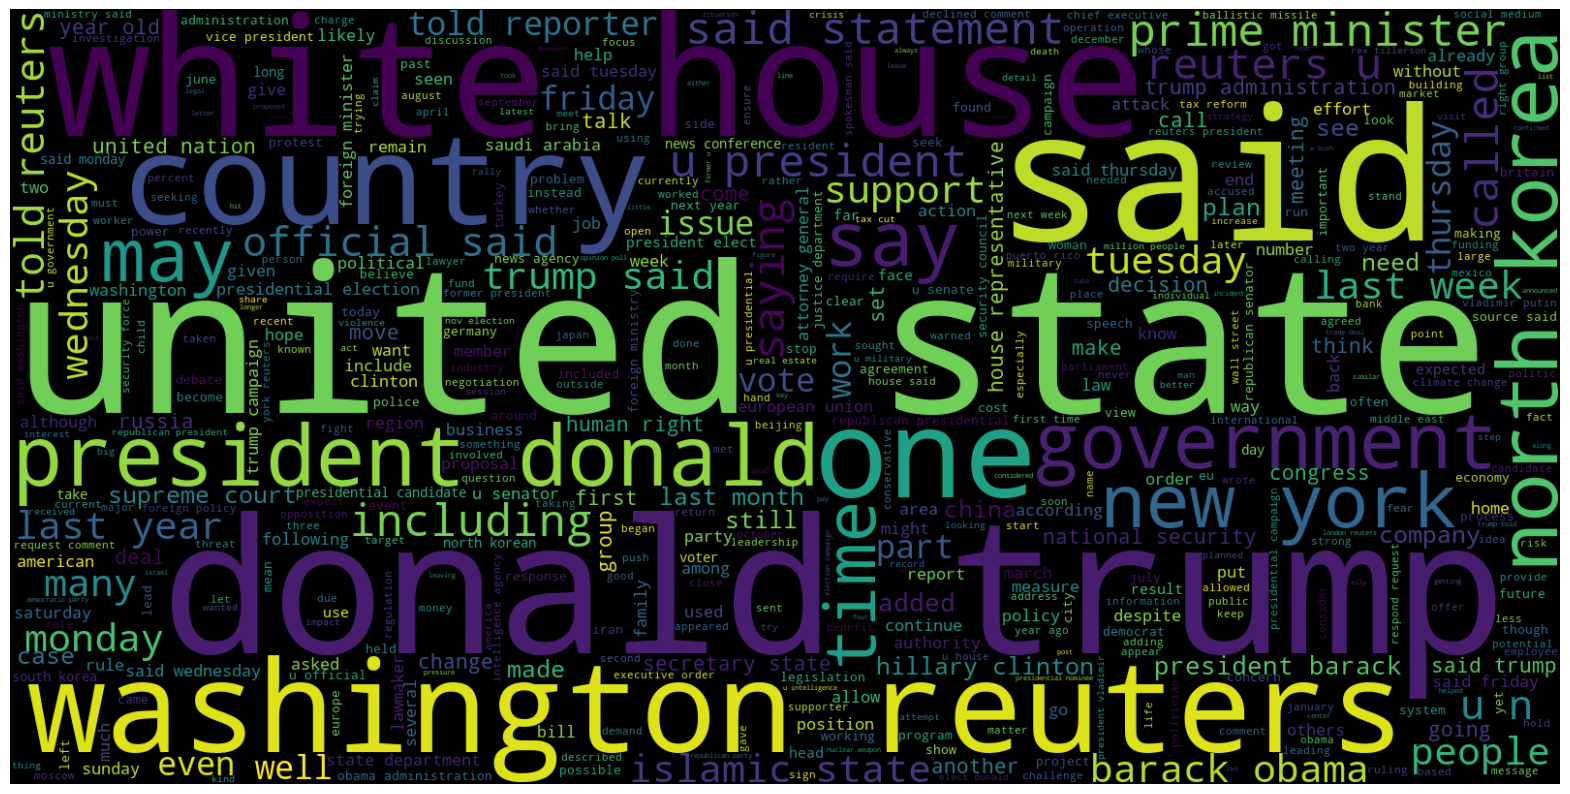

In [40]:
#True news
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(" ".join(df[df.category == 0 ].text))
plt.axis('off')
plt.imshow(Wc , interpolation = 'bilinear')

In [41]:
#pil is pillow and used for image manupulation
from PIL import Image

In [42]:
thumb = './images/thumb-up.jpg'
icon = Image.open(thumb).convert("RGB") 
mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
mask.paste(icon, (0, 0)) 

rgb_array = np.array(mask)

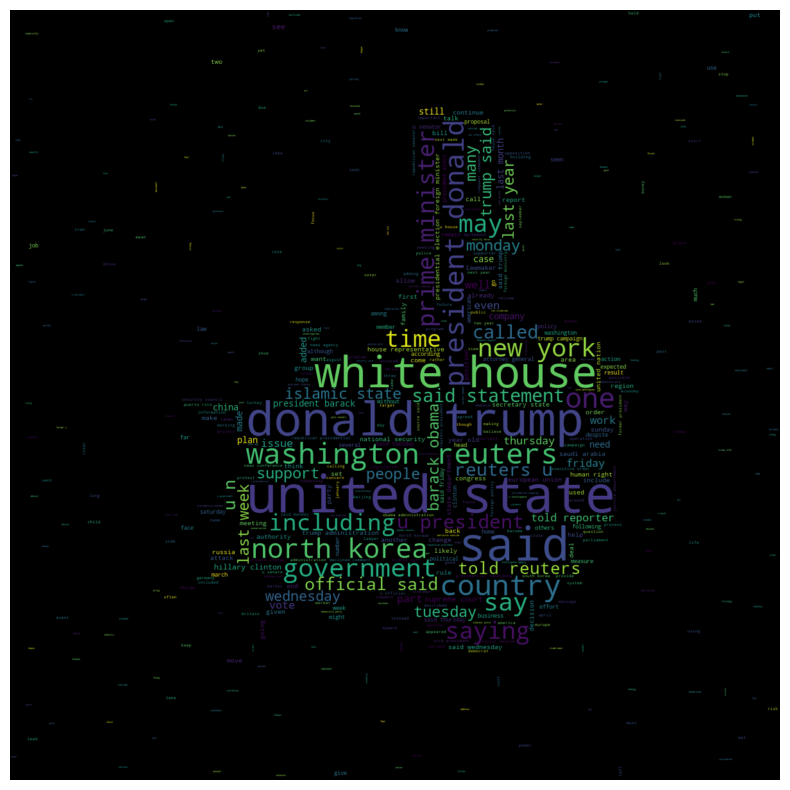

In [43]:
#True news
plt.figure(figsize = (10,10))
Wc = WordCloud(mask=rgb_array, max_words = 500, width = 1600, height = 800).generate(" ".join(df[df.category == 0 ].text))
plt.axis('off')
plt.imshow(Wc , interpolation = 'bilinear')

In [44]:
from collections import Counter

In [45]:
# Get the most common words
word_counts = Counter(" ".join(df['text']).split())
common_words = word_counts.most_common(20)

In [46]:
common_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])


C:\Users\Vansh\AppData\Local\Temp\ipykernel_23344\2865538942.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_df['Frequency'], y=common_df['Word'], palette="viridis")


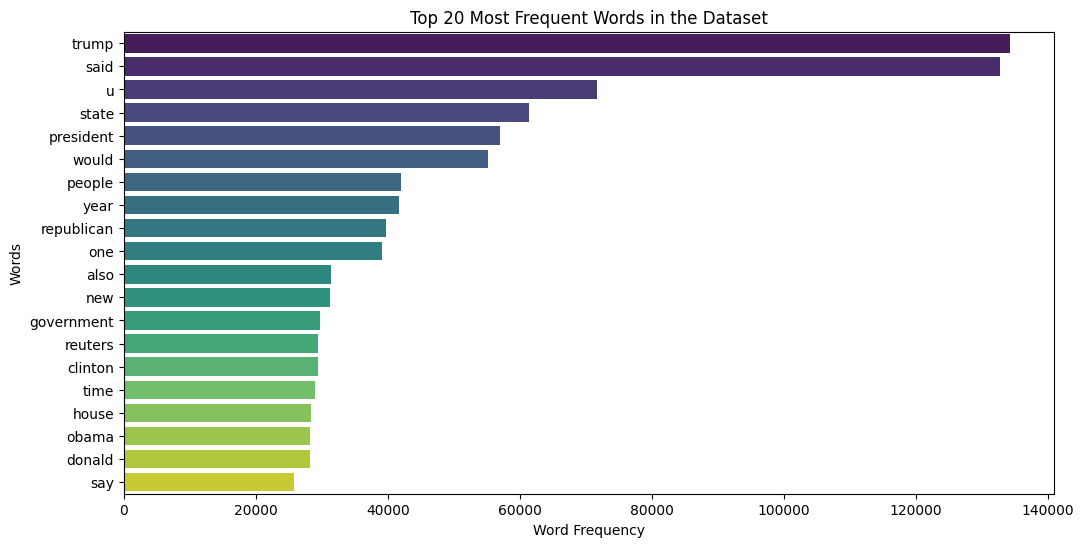

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(x=common_df['Frequency'], y=common_df['Word'], palette="viridis")
plt.xlabel("Word Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Frequent Words in the Dataset")
plt.show()

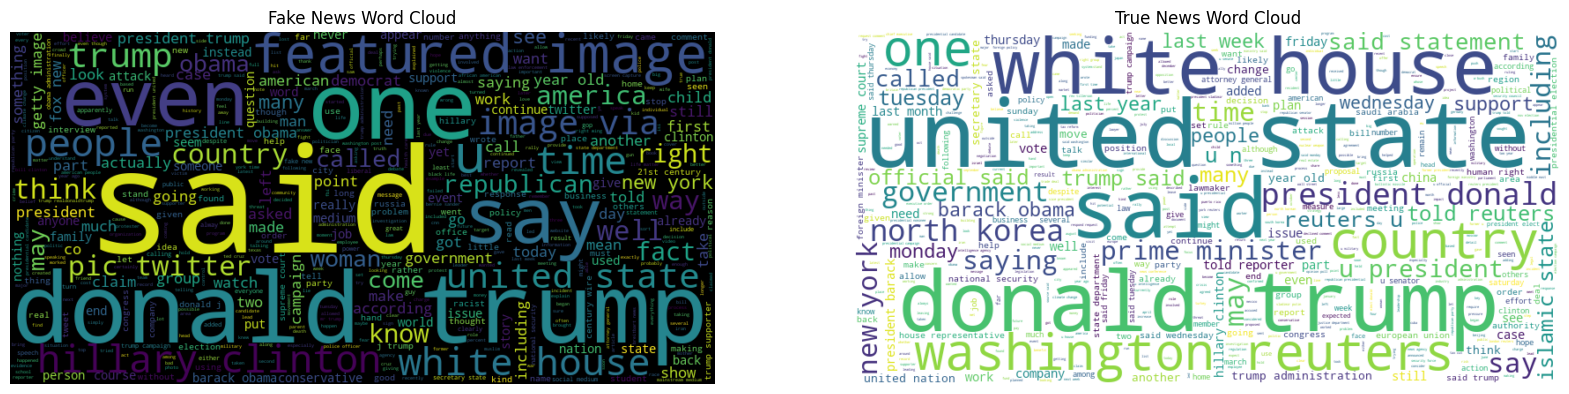

In [48]:
plt.figure(figsize=(20,10))

# Fake News Word Cloud
plt.subplot(1, 2, 1)
wc_fake = WordCloud(max_words=500, width=800, height=400, background_color='black').generate(" ".join(df[df.category == 1].text))
plt.imshow(wc_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Fake News Word Cloud")

# True News Word Cloud
plt.subplot(1, 2, 2)
wc_true = WordCloud(max_words=500, width=800, height=400, background_color='white').generate(" ".join(df[df.category == 0].text))
plt.imshow(wc_true, interpolation='bilinear')
plt.axis('off')
plt.title("True News Word Cloud")

plt.show()


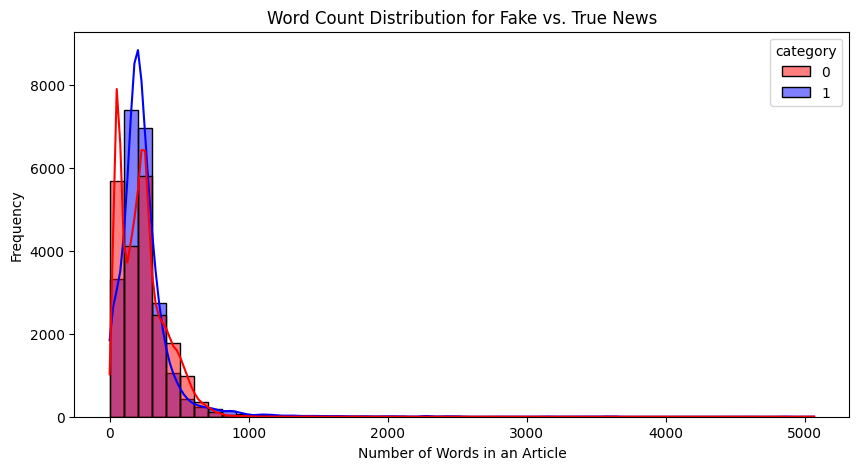

In [49]:
df["word_count"] = df["text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,5))
sns.histplot(data=df, x="word_count", hue="category", bins=50, kde=True, palette=["red", "blue"])
plt.xlabel("Number of Words in an Article")
plt.ylabel("Frequency")
plt.title("Word Count Distribution for Fake vs. True News")
plt.show()

In [50]:
pip install TextBlob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Vansh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


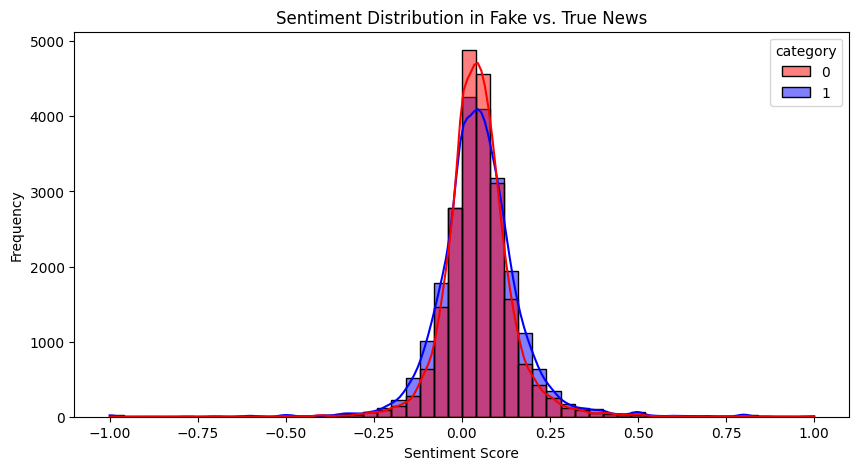

In [51]:
from textblob import TextBlob

df["sentiment"] = df["text"].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10,5))
sns.histplot(data=df, x="sentiment", hue="category", bins=50, kde=True, palette=["red", "blue"])
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Sentiment Distribution in Fake vs. True News")
plt.show()


Model Building

In [52]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Vansh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [53]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

In [55]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4838435 stored elements and shape (29658, 95402)>

In [56]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf, y_train)

LinearSVC()

In [57]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([("tfidf",TfidfVectorizer()),("clf",LinearSVC())])
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [58]:
predictions = text_clf.predict(X_test)

In [59]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7047
           1       0.99      0.99      0.99      7562

    accuracy                           0.99     14609
   macro avg       0.99      0.99      0.99     14609
weighted avg       0.99      0.99      0.99     14609



In [60]:
print(metrics.accuracy_score(y_test, predictions))

0.9937709631049353


In [61]:
print(metrics.confusion_matrix(y_test, predictions))

[[7005   42]
 [  49 7513]]


C:\Users\Vansh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


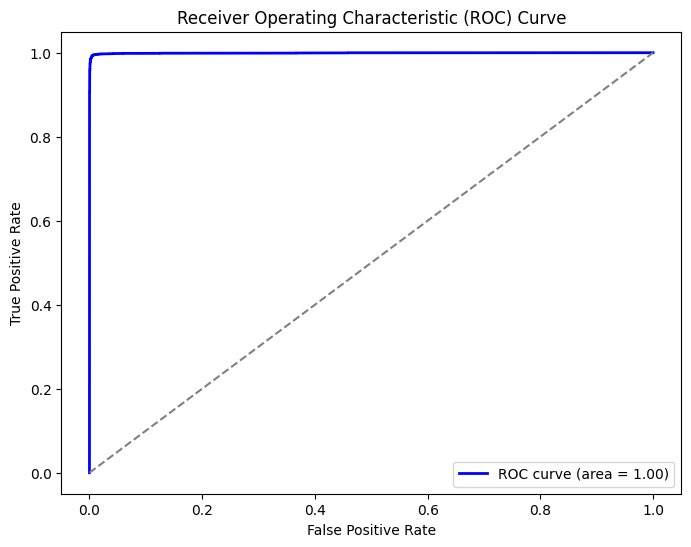

In [62]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calibrate LinearSVC to obtain probability estimates
calibrated_clf = CalibratedClassifierCV(text_clf.named_steps["clf"], cv="prefit")
calibrated_clf.fit(text_clf.named_steps["tfidf"].transform(X_train), y_train)

# Predict probabilities
y_prob = calibrated_clf.predict_proba(text_clf.named_steps["tfidf"].transform(X_test))[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()
